In [67]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [69]:
# hyperparameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [70]:
train_data = pd.read_csv(r"D:\Downloads\train.csv")
print(train_data.shape)
X_train = torch.tensor(train_data.iloc[:,1:].values, dtype=torch.float32)
print(X_train.shape)
Y_train = torch.tensor(train_data.iloc[:,0:1].values, dtype = torch.float32)
print(Y_train.shape)

data = torch.utils.data.TensorDataset(X_train,Y_train)
data[0]

(42000, 785)
torch.Size([42000, 784])
torch.Size([42000, 1])


(tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         188., 255.,  94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,  

In [71]:
data_loader = torch.utils.data.DataLoader(dataset = data, batch_size=batch_size, shuffle = True)

torch.Size([784])


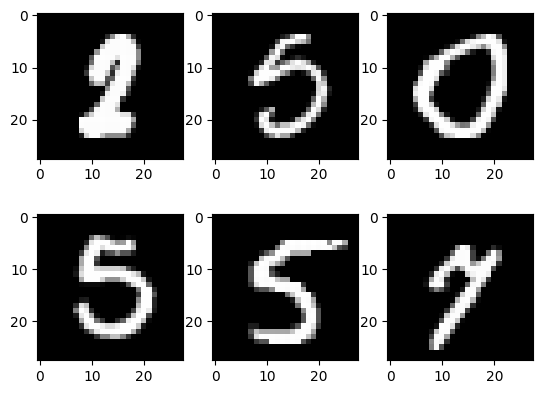

In [72]:
examples = iter(data_loader)
samples, labels = next(examples)
print(samples[0].shape)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i].reshape(28,28), cmap = 'gray')
plt.show()

In [73]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    def forward(self,x):
        x = x.to(torch.float32)
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x


In [74]:
model = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=learning_rate)

In [75]:
for i, (image,labels) in enumerate(data_loader):
    # print(labels.shape)
    y = model(image)
    print(y.shape)
    print(labels.view(100).shape)

torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])
torch.Size([100, 10])
torch.Size([100])


In [76]:
n_total_steps = len(data_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(data_loader):
        images = images.reshape(-1,784).to(device)
        labels = labels.to(device)
        labels = labels.type(torch.LongTensor)
        model = model.to(device)
        y_pred = model(images)
        loss = criterion(y_pred, labels.view(100))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if(i+1)%100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1 / 10, step 100/420, loss = 0.7082
epoch 1 / 10, step 200/420, loss = 0.3954
epoch 1 / 10, step 300/420, loss = 0.2335
epoch 1 / 10, step 400/420, loss = 0.2301
epoch 2 / 10, step 100/420, loss = 0.3269
epoch 2 / 10, step 200/420, loss = 0.2823
epoch 2 / 10, step 300/420, loss = 0.2556
epoch 2 / 10, step 400/420, loss = 0.2102
epoch 3 / 10, step 100/420, loss = 0.0235
epoch 3 / 10, step 200/420, loss = 0.1131
epoch 3 / 10, step 300/420, loss = 0.1401
epoch 3 / 10, step 400/420, loss = 0.1540
epoch 4 / 10, step 100/420, loss = 0.0680
epoch 4 / 10, step 200/420, loss = 0.1219
epoch 4 / 10, step 300/420, loss = 0.1619
epoch 4 / 10, step 400/420, loss = 0.1565
epoch 5 / 10, step 100/420, loss = 0.0425
epoch 5 / 10, step 200/420, loss = 0.1572
epoch 5 / 10, step 300/420, loss = 0.0523
epoch 5 / 10, step 400/420, loss = 0.1730
epoch 6 / 10, step 100/420, loss = 0.0472
epoch 6 / 10, step 200/420, loss = 0.0118
epoch 6 / 10, step 300/420, loss = 0.2289
epoch 6 / 10, step 400/420, loss =

In [80]:
test_set = pd.read_csv(r"D:\Downloads\test.csv")
X_test = torch.tensor(test_set.values, dtype=torch.float32)



In [88]:
X_test.shape
for image in X_test:
    print(image.shape)

torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size

In [91]:
ImageId = []
Labels = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    i=0
    for image in X_test:
        image = image.reshape(-1,28*28).to(device)
        outputs = model(image)

        _,predictions = torch.max(outputs,1)
        ImageId.append(i+1)
        Labels.append(predictions.item())
        i=i+1

In [94]:
df = pd.DataFrame({'ImageId': ImageId, 'Label':Labels})
df
df.to_csv('submission.csv', index=False)